In [14]:
#Importing neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [15]:
# Loading data from python inbuilt dataaset
boston_dataset = datasets.load_boston()
boston_df = pd.DataFrame(boston_dataset.data)
boston_df.columns = boston_dataset.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
# Load the dataset into Pandas Dataframe


boston_npy_target_column = np.asarray(boston_dataset.target)
boston_df['House_Price'] = pd.Series(boston_npy_target_column)

#Separating predictors and response
predictors = boston_df.iloc[:, :-1]
response = boston_df.iloc[:, -1]


In [18]:
response.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: House_Price, dtype: float64

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors,response,test_size = 0.20)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


R squared Error on test set :  0.5823432784573012
   Column_Name  Coefficient_Value
0         CRIM          -0.130955
1           ZN           0.043321
2        INDUS           0.048065
3         CHAS           4.302752
4          NOX         -17.650626
5           RM           4.171555
6          AGE           0.018929
7          DIS          -1.250016
8          RAD           0.314749
9          TAX          -0.009826
10     PTRATIO          -0.914086
11           B           0.010046
12       LSTAT          -0.597622


<BarContainer object of 13 artists>

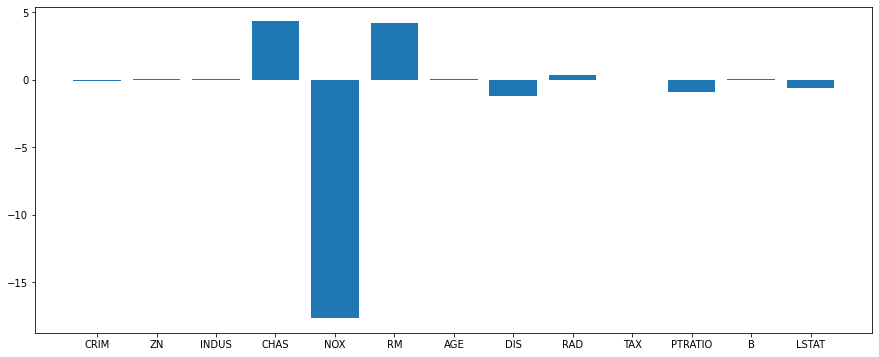

In [20]:
# Apply a normal linear regression
linearreg = LinearRegression()
linearreg.fit(X_train, Y_train)

# predicting on test
linearreg_prediction = linearreg.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(linearreg_prediction,Y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(linearreg.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])


In [ ]:
# import ridge regression library
from sklearn.linear_model import Ridge

# Train the model
ridgeRegressor = Ridge(alpha = 0.5) #here setting alpha 1
ridgeRegressor.fit(X_train, Y_train)
y_predicted_ridge = ridgeRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_ridge,Y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = x_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(ridgeRegressor.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

R squared Error on test set :  0.4845050892603663
   Column_Name  Coefficient_Value
0         CRIM          -0.079377
1           ZN           0.045579
2        INDUS          -0.000000
3         CHAS           0.000000
4          NOX          -0.000000
5           RM           1.017088
6          AGE           0.048613
7          DIS          -0.450187
8          RAD           0.267852
9          TAX          -0.011745
10     PTRATIO          -0.749902
11           B           0.008709
12       LSTAT          -0.876529


<BarContainer object of 13 artists>

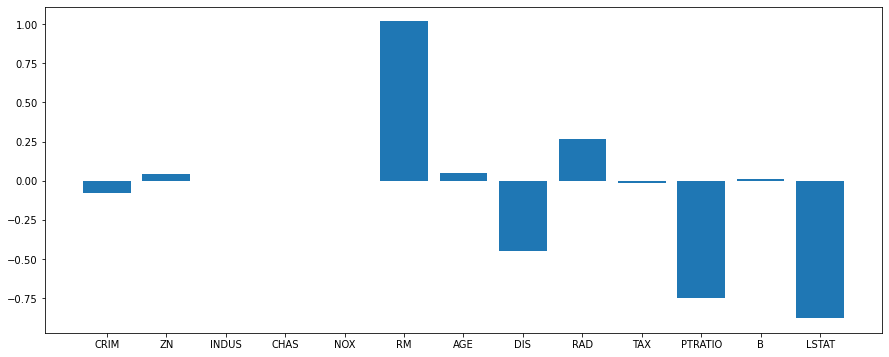

In [24]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lassoRegressor = Lasso(alpha = 1) #here setting alpha 
lassoRegressor.fit(X_train, Y_train)
y_predicted_lasso = lassoRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_lasso,Y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(lassoRegressor.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

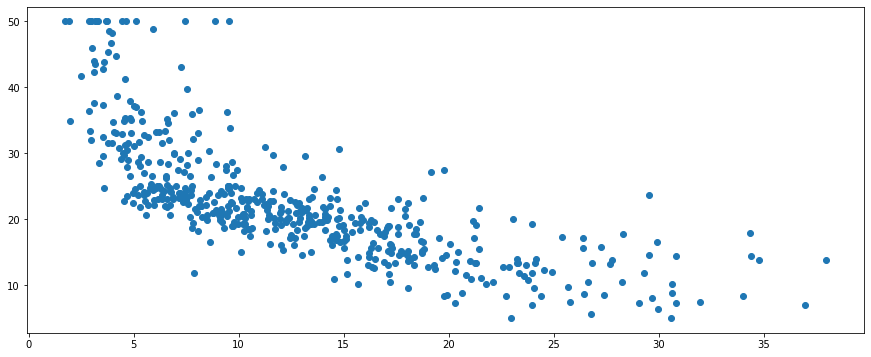

In [8]:
import seaborn as sns
#sns.pairplot(boston_df)
plt.scatter(boston_df['LSTAT'],boston_df['House_Price'])